# Support Vector Machines

https://www.geeksforgeeks.org/machine-learning/support-vector-machine-algorithm/

## Linear SVM Classification

In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [6]:
iris.data[:3], iris.target[:3], iris.target_names

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                5.1               3.5                1.4               0.2
 1                4.9               3.0                1.4               0.2
 2                4.7               3.2                1.3               0.2,
 0    0
 1    0
 2    0
 Name: target, dtype: int64,
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [7]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)  # Iris virginica

svm_clf = make_pipeline(
    StandardScaler(),
    LinearSVC(C=1, dual="auto", random_state=42)
)

svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [8]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

*Pierwsza roślina zostaje sklasyfikowana jako Iris virginica, a druga nie. Przyjrzyjmy się ocenom, za
pomocą których model SVM uzyskał te przewidywania. Mierzą one określoną znakiem odległość
między każdym przykładem a granicą decyzyjną*

In [9]:
svm_clf.decision_function(X_new)

array([ 0.66163816, -0.22035761])

*W przeciwieństwie do klasy LogisticRegression, model `LinearSVC` nie zawiera metody predict_proba()
szacującej prawdopodobieństwo przynależności do klasy. Jednak jeśli użyjesz klasy `SVC`
zamiast `LinearSVC` i wyznaczysz wartość True jej hiperparametru probability, to na
koniec uczenia zostanie dopasowany dodatkowy model odwzorowujący wyniki funkcji decyzyjnej
SVC na szacowane prawdopodobieństwa. Wymaga to użycia pięciokrotnego sprawdzianu krzyżowego
do wygenerowania pozapróbkowych przewidywań dla każdego przykładu w zbiorze uczącym,
a następnie wytrenowania modelu `LogisticRegression`, zatem proces uczenia zajmie znacznie
więcej czasu. Na koniec będą dostępne metody `predict_proba()` i `predict_log_proba()`.*

## Nonlinear SVM Classification

In [10]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, random_state=42)
)
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

In [11]:
X[:3], y[:3]

(array([[ 1.61383833, -0.49115086],
        [ 0.08984723,  0.50439056],
        [ 0.74721047, -0.36911116]]),
 array([1, 1, 1]))

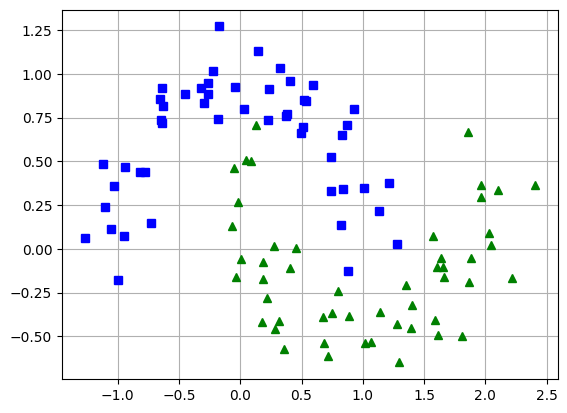

In [12]:
import matplotlib.pyplot as plt

plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
plt.grid(True)
plt.show()

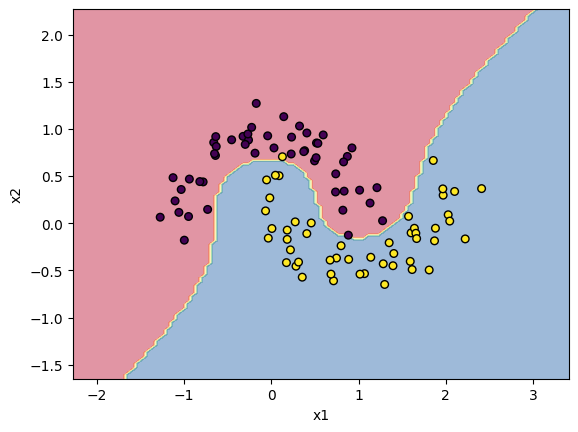

In [13]:
from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
    polynomial_svm_clf,
    X,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.5,
    xlabel="x1",
    ylabel="x2"
)

plt.scatter(X[:, 0], X[:, 1],
            c=y,
            s=30, edgecolors="k")

plt.show()

## Gaussian RBF Kernel

In [14]:
from sklearn.svm import SVC

rbf_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf", gamma=4, C=1)
)

rbf_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, gamma=4))])

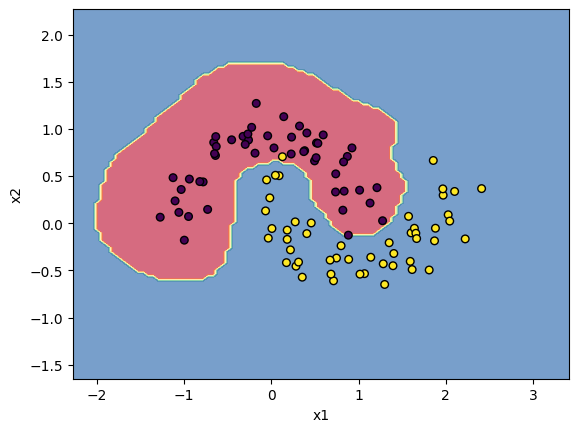

In [15]:
DecisionBoundaryDisplay.from_estimator(
    rbf_clf,
    X,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.7,
    xlabel="x1",
    ylabel="x2"
)

plt.scatter(X[:, 0], X[:, 1],
            c=y,
            s=30, edgecolors="k")
plt.show()

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

pipeline = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf')
)

param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best result (accuracy):", grid_search.best_score_)

Best params: {'svc__C': 1, 'svc__gamma': 1}
Best result (accuracy): 0.9466666666666667


In [ ]:
print("Best params:", grid_search.best_params_)
print("Best result (neg MSE):", grid_search.best_score_)


Accuracy (test): 0.98

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.96      1.00      0.98        25

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50


Confusion matrix:



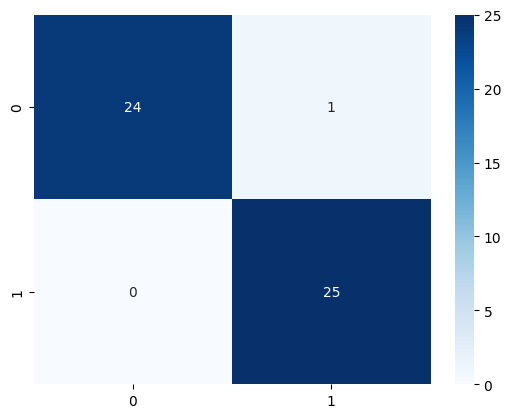

In [43]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nAccuracy (test):", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

In [44]:
def plot_decision_boundary(model, X, y, title=""):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=40, edgecolors='k')
    plt.title(title)
    plt.show()

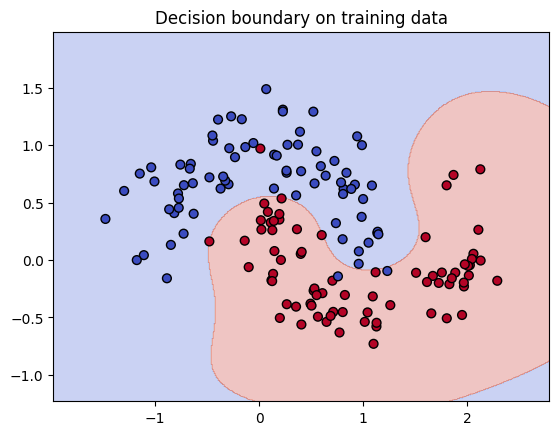

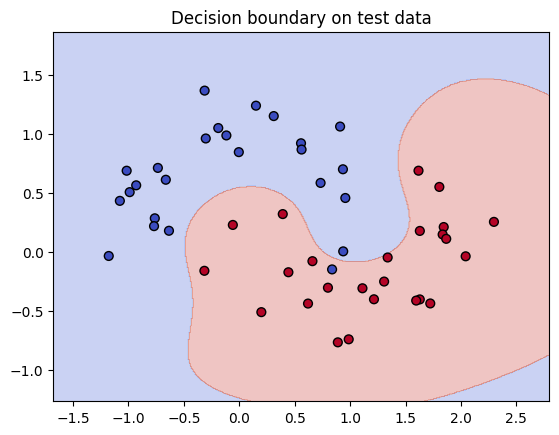

In [45]:
plot_decision_boundary(best_model, X_train, y_train, "Decision boundary on training data")
plot_decision_boundary(best_model, X_test, y_test, "Decision boundary on test data")

## LinearSVR (regression)

In [16]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

m = 200
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(m)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linsvr_clf = make_pipeline(
    StandardScaler(),
    LinearSVR(epsilon=0.5, C=1.0, random_state=42)
)

linsvr_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5, random_state=42))])

In [17]:
y_pred = linsvr_clf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R² score: {r2:.4f}')

MSE: 0.9867
MAE: 0.7839
R² score: 0.7721


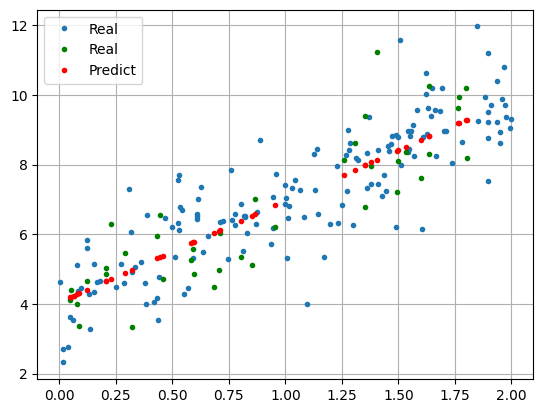

In [40]:
import matplotlib.pyplot as plt

plt.plot(X_train, y_train, ".", label="Real")
plt.plot(X_test, y_test, "g.", label="Real")
plt.plot(X_test, y_pred, "r.", label="Predict")
plt.grid()
plt.legend(loc="upper left")
plt.show()

#### How to choose the best values for model hyperparameters? (GridSearchCV)

In [34]:
from sklearn.model_selection import GridSearchCV

linsvr_pipe = make_pipeline(
    StandardScaler(),
    LinearSVR(random_state=42, max_iter=5000)
)

param_grid = {
    'linearsvr__epsilon': [0.01, 0.1, 0.5, 1.0, 2.0],
    'linearsvr__C': [0.1, 1, 10]
}

grid_search = GridSearchCV(linsvr_pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

print("Best params:", grid_search.best_params_)
print("Best result (neg MSE):", grid_search.best_score_)

Best params: {'linearsvr__C': 1, 'linearsvr__epsilon': 0.1}
Best result (neg MSE): -0.9943064519273292


In [36]:
linsvr_best = grid_search.best_estimator_

y_pred = linsvr_best.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R² score: {r2:.4f}')

MSE: 0.9791
MAE: 0.7865
R² score: 0.7739


In [38]:
# y = 4 + 3 * x

linsvr_best.predict([[4]])

array([15.70411127])